In [11]:
import skimage
from skimage import data
from skimage import io
from skimage import feature

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

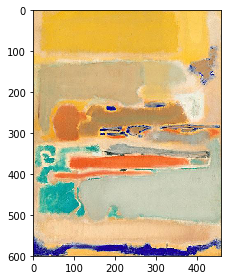

In [85]:
img = io.imread('../images/wikiart/1948_1.jpg')
io.imshow(img)

## Get the shape_index of an image and return the average of squares of the resulting shape_index array

In [16]:
shape_index = feature.shape_index(img)
shape_index

array([[0.54881337, 0.74331661, 0.82670035, ..., 0.77083213, 0.740393  ,
        0.57302865],
       [0.74302014, 0.86409955, 0.87437745, ..., 0.80508861, 0.85256621,
        0.76574859],
       [0.79786506, 0.8434939 , 0.93700372, ..., 0.8611882 , 0.90494633,
        0.8740062 ],
       ...,
       [0.67487403, 0.64630187, 0.47365432, ..., 0.94611923, 0.88709961,
        0.85902849],
       [0.7460369 , 0.88744476, 0.86376681, ..., 0.85060476, 0.90871358,
        0.79297039],
       [0.57041115, 0.84770355, 0.45370016, ..., 0.82880818, 0.79619727,
        0.58450491]])

In [17]:
shape_index.shape

(600, 460)

In [27]:
single_shape_index = np.ravel(shape_index)

In [30]:
single_shape_index

array([0.54881337, 0.74331661, 0.82670035, ..., 0.82880818, 0.79619727,
       0.58450491])

In [32]:
np.average(np.square(single_shape_index))

0.2548689797960748

In [39]:
# This function takes an image path and calculates the shape_index of the image which is an array
# It then returns the average of squares of the shape_index array
# from skimage import feature will be needed
def get_shape_index(img_file_path):
    img = io.imread(img_file_path, as_gray=True)
    shape_index = feature.shape_index(img)
    shape_index_1D = np.ravel(shape_index)
    avg_squares_shape_index = np.average(np.square(shape_index_1D))
    return avg_squares_shape_index




In [41]:
get_shape_index('../images/wikiart/1948_1.jpg')

0.2548689797960748

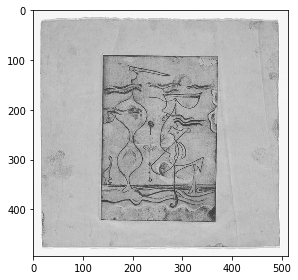

In [42]:
img = io.imread('../images/Rothko_moma/1951_41.jpg', as_gray=True)
io.imshow(img)

In [43]:
get_shape_index('../images/Rothko_moma/1951_41.jpg')

/Users/rupali/anaconda3/lib/python3.6/site-packages/skimage/feature/corner.py:421: RuntimeWarning: divide by zero encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/Users/rupali/anaconda3/lib/python3.6/site-packages/skimage/feature/corner.py:421: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


nan

In [44]:
get_shape_index('../images/wikiart/1948_1.jpg')

0.2548689797960748

## Get the spatial dimensions of an image

In [45]:
from skimage import color

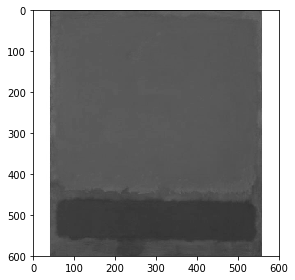

In [64]:
img_file_path = '../images/Rothko_moma/1951_41.jpg'
img_file_path = '../images/wikiart/1962_2.jpg'
img = io.imread(img_file_path, as_gray=True)
io.imshow(img)


In [65]:
val = color.guess_spatial_dimensions(img)
val

2

In [66]:
from skimage import exposure

In [67]:
exposure.histogram(img)

(array([    2,    14,    43,   172,   889,  1766,  5173,  4669,  7798,
         7079,  4376,  3828,  4336,  4002,  1785,   932,   875,   544,
          497,   567,   478,   540,   619,   673,  1023,  1105,  1318,
         1606,  1467,  1743,  2259,  2195,  2341,  1980,  1450,  1782,
         1846,  1842,  1515,  1266,  1735,  2112,  3558,  7303, 12417,
        16928, 17929, 27976, 38350, 33532, 27905, 18640,  9337,  3759,
         2237,  1335,  1014,   828,   776,   681,   630,   520,   363,
          323,   223,   182,   143,   100,    87,    83,    46,    45,
           27,    20,    14,    23,    10,     9,     5,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

## Structure tensor

In [76]:
st = feature.structure_tensor(img)
Axx, Axy, Ayy = feature.structure_tensor(img, sigma=0.1)

In [82]:
feature.structure_tensor_eigvals(Axx, Axy, Ayy)[0]

array([[18., 16., 16., ..., 16., 16., 18.],
       [16.,  0.,  0., ...,  0.,  0., 16.],
       [16.,  0.,  0., ...,  0.,  0., 16.],
       ...,
       [16.,  0.,  0., ...,  0.,  0., 16.],
       [16.,  0.,  0., ...,  0.,  0., 16.],
       [18., 16., 16., ..., 16., 16., 18.]])

In [83]:
def mean_color(img):
    #read in image
    img=io.imread(img)
    #flatten image
    flat_img=[]
    for x in img:
        for y in x:
            flat_img.append(y)
    #calculate mean red, green and blue
    r = np.array([x[0] for x in flat_img]).mean()
    g = np.array([x[1] for x in flat_img]).mean()
    b = np.array([x[2] for x in flat_img]).mean()
    #combine into one array
    rgb=[r,g,b]
    return rgb

## Get Image Contrast
K = (I_max - I_min)/(I_max + I_min)
where K is contrast and I is luminance

luminance = (0.2126*rgb[0] + 0.7152*rgb[1] + 0.0722*rgb[2])
#where rgb = (red, green, blue)


In [78]:
def getImageContranst(img_file_path):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-78-5d8c732872b6>, line 2)

In [84]:
img_file_path = '../images/wikiart/1948_1.jpg'
mean_color(img_file_path)

[206.14740217391304, 178.5302536231884, 126.62197101449276]

In [80]:
np.ravel(img)

array([0.75449373, 0.80771412, 0.80322706, ..., 0.72940157, 0.70925804,
       0.6510149 ])

In [86]:
flat_img = []
for x in img:
    for y in x:
        flat_img.append(y)

In [87]:
flat_img

[array([228, 187, 141], dtype=uint8),
 array([241, 201, 152], dtype=uint8),
 array([240, 200, 149], dtype=uint8),
 array([233, 193, 141], dtype=uint8),
 array([235, 196, 139], dtype=uint8),
 array([234, 196, 134], dtype=uint8),
 array([233, 195, 132], dtype=uint8),
 array([239, 201, 136], dtype=uint8),
 array([232, 195, 127], dtype=uint8),
 array([232, 195, 127], dtype=uint8),
 array([234, 197, 129], dtype=uint8),
 array([235, 197, 132], dtype=uint8),
 array([237, 199, 136], dtype=uint8),
 array([238, 200, 138], dtype=uint8),
 array([239, 201, 139], dtype=uint8),
 array([240, 201, 142], dtype=uint8),
 array([225, 196, 128], dtype=uint8),
 array([233, 203, 133], dtype=uint8),
 array([234, 201, 130], dtype=uint8),
 array([228, 194, 122], dtype=uint8),
 array([236, 199, 128], dtype=uint8),
 array([253, 213, 144], dtype=uint8),
 array([253, 209, 146], dtype=uint8),
 array([239, 193, 134], dtype=uint8),
 array([240, 191, 135], dtype=uint8),
 array([244, 194, 141], dtype=uint8),
 array([248,

In [100]:
lum = []
for rgb in flat_img:
    luminance = (0.2126*rgb[0] + 0.7152*rgb[1] + 0.0722*rgb[2])
    lum.append(luminance)

lum
lmin = np.min(lum)
lmax = np.max(lum)
contrast = (lmax-lmin)/(lmax + lmin)
contrast

0.9887869281168719

In [105]:
def getImageContrast(img_file_path):
    img = io.imread(img_file_path)

    for x in img:
        for y in x:
            flat_img.append(y)
        
    lum = []

    for rgb in flat_img:
        luminance = (0.2126*rgb[0] + 0.7152*rgb[1] + 0.0722*rgb[2])
        lum.append(luminance)

    lmin = np.min(lum)
    lmax = np.max(lum)

    return (lmax-lmin)/(lmax + lmin)


In [106]:
img_file_path = '../images/wikiart/1948_1.jpg'


getImageContrast(img_file_path)

0.9887869281168719